In [1]:
# import realistic model package
from realistic import *

#setup plotting 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
plt.style.use('./matplotlib/SciencePlots-APS.mplstyle')

In [2]:
# parameters
## Cell temperature
Tcell = np.array([500.0, 750.0, 1000.0])               # [K]
## ambient temperature
Tamb = 300.0                                           # [K]
## Global heat transfer coefficient 
UU = 2.0                                               # [W m^−2 K^−1]
## Thickness
dd = 5.0e-8                                            # [m]

In [3]:
# define chemical potential list without nonradiative generation ratio
def muList(temp_cell, temp_amb, egap, omega, alpha, refractive, reflectivity, thickness):
    muVoc = np.round(cellTRRealistic.find_mu(egap, temp_cell, temp_amb, omega, alpha, refractive, reflectivity, thickness), decimals=6)
    return np.linspace(muVoc, 0.0, 501)    

## III-V group

### GaAs

In [4]:
# Bandgap energy
EgapGaAs = 1.016                     # [eV]
# Load optical data
EnGaAs, RefractiveGaAs, ExtinctionGaAs, AbsorptionGaAs = np.loadtxt('../data/dft/DFTAnalysis/optical-data/OptGaAs.dat', unpack=True)
# Calculate Reflectivity
ReflectivityGaAs = cellTRRealistic.reflectivity(RefractiveGaAs, ExtinctionGaAs)
# Calculate absorptivity 
AbsorptivityGaAs = cellTRRealistic.absorptivity(AbsorptionGaAs, ReflectivityGaAs, dd)

### GaSb

In [5]:
# Bandgap energy
EgapGaSb = 0.554               # [eV]
# Load optical data
EnGaSb, RefractiveGaSb, ExtinctionGaSb, AbsorptionGaSb = np.loadtxt('../data/dft/DFTAnalysis/optical-data/OptGaSb.dat', unpack=True)
# Calculate reflectivity
ReflectivityGaSb = cellTRRealistic.reflectivity(RefractiveGaSb, ExtinctionGaSb)
# Calculate absorptivity 
AbsorptivityGaSb = cellTRRealistic.absorptivity(AbsorptionGaSb, ReflectivityGaSb, dd)

### InAs

In [6]:
# Bandgap energy
EgapInAs = 0.209               # [eV]
# Load optical data
EnInAs, RefractiveInAs, ExtinctionInAs, AbsorptionInAs = np.loadtxt('../data/dft/DFTAnalysis/optical-data/OptInAs.dat', unpack=True)
# Calculate reflectivity
ReflectivityInAs = cellTRRealistic.reflectivity(RefractiveInAs, ExtinctionInAs)
# Calculate absorptivity 
AbsorptivityInAs = cellTRRealistic.absorptivity(AbsorptionInAs, ReflectivityInAs, dd)

### InP

In [7]:
# Bandgap energy
EgapInP = 1.240               # [eV]
# Load optical data
EnInP, RefractiveInP, ExtinctionInP, AbsorptionInP = np.loadtxt('../data/dft/DFTAnalysis/optical-data/OptInP.dat', unpack=True)
# Calculate reflectivity
ReflectivityInP = cellTRRealistic.reflectivity(RefractiveInP, ExtinctionInP)
# Calculate absorptivity 
AbsorptivityInP = cellTRRealistic.absorptivity(AbsorptionInP, ReflectivityInP, dd)

## Silicon

In [8]:
# Bandgap energy
EgapSi = 0.452               # [eV]
# Load optical data
EnSi, RefractiveSi, ExtinctionSi, AbsorptionSi = np.loadtxt('../data/dft/DFTAnalysis/optical-data/OptSi.dat', unpack=True)
# Calculate reflectivity
ReflectivitySi = cellTRRealistic.reflectivity(RefractiveSi, ExtinctionSi)
# Calculate absorptivity 
AbsorptivitySi = cellTRRealistic.absorptivity(AbsorptionSi, ReflectivitySi, dd)

## Power density ideal case

In [9]:
# GaAs
PowerDensityGaAs = np.array([
                   np.array([cellTRRealistic.power_density(EgapGaAs, Tc, Tamb, x, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd) 
                   for x in muList(Tc, Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd)])
                   for Tc in Tcell
                   ])
# GaSb
PowerDensityGaSb = np.array([
                   np.array([cellTRRealistic.power_density(EgapGaSb, Tc, Tamb, x, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd) 
                   for x in muList(Tc, Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd)])
                   for Tc in Tcell
                   ])
# InAs
PowerDensityInAs = np.array([
                   np.array([cellTRRealistic.power_density(EgapInAs, Tc, Tamb, x, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd) 
                   for x in muList(Tc, Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd)])
                   for Tc in Tcell
                   ])
# InP
PowerDensityInP = np.array([
                   np.array([cellTRRealistic.power_density(EgapInP, Tc, Tamb, x, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd) 
                   for x in muList(Tc, Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd)])
                   for Tc in Tcell
                   ])
# Si
PowerDensitySi = np.array([
                   np.array([cellTRRealistic.power_density(EgapSi, Tc, Tamb, x, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd) 
                   for x in muList(Tc, Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd)])
                   for Tc in Tcell
                   ])

In [10]:
# Maximum power density
MaxPowerDensityGaAs = np.max(PowerDensityGaAs, axis=1)
MaxPowerDensityGaSb = np.max(PowerDensityGaSb, axis=1)
MaxPowerDensityInAs = np.max(PowerDensityInAs, axis=1)
MaxPowerDensityInP = np.max(PowerDensityInP, axis=1)
MaxPowerDensitySi = np.max(PowerDensitySi, axis=1)

#print data
print('###################################')
print('Maximum Power Density[W/m^2]')
print('###################################')
print('# Tc [K]   GaAs          GaSb          InAs          InP           Si')

for i in range(len(Tcell)):
    print('{:<5.0f}      {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f}'.format(
        Tcell[i], 
        MaxPowerDensityGaAs[i], 
        MaxPowerDensityGaSb[i], 
        MaxPowerDensityInAs[i], 
        MaxPowerDensityInP[i], 
        MaxPowerDensitySi[i]
    ))

###################################
Maximum Power Density[W/m^2]
###################################
# Tc [K]   GaAs          GaSb          InAs          InP           Si
500        0.00000858    0.09078644    28.16311090   0.00000009    0.04526580   
750        0.06250653    19.86166463   599.75287720  0.00354813    4.70077629   
1000       6.84404731    391.02994635  3825.72690864 0.91864845    64.44414847  


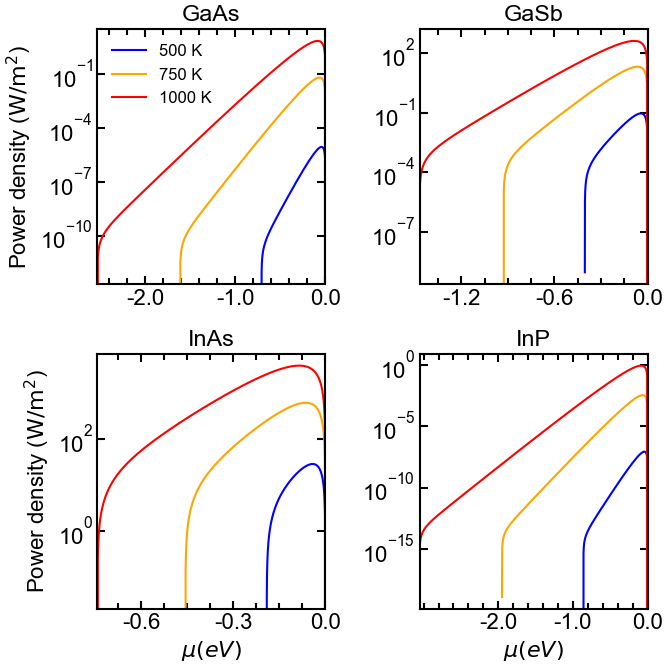

In [11]:
# plotting 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

# ----------------------------------#
# plot GaAs
# ----------------------------------#
axes[0,0].plot(muList(Tcell[0], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), PowerDensityGaAs[0, :], c='blue', label='500 K')
axes[0,0].plot(muList(Tcell[1], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), PowerDensityGaAs[1, :], c='orange', label='750 K')
axes[0,0].plot(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), PowerDensityGaAs[2, :], c='red', label='1000 K')
# X-axis
axes[0,0].set_xlim(np.min(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd)), 0.0)
axes[0,0].set_xticks([-2.0, -1.0, 0.0])
axes[0,0].set_xticklabels(['-2.0', '-1.0', '0.0'])
# Y-axis
axes[0,0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
axes[0,0].set_yscale('log')  # Added logarithmic scale to the y-axis

axes[0,0].legend(loc='best', prop={'size': 12})
axes[0,0].set_title(r'GaAs')

# ----------------------------------#
# plot GaSb
# ----------------------------------#
axes[0,1].plot(muList(Tcell[0], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), PowerDensityGaSb[0, :], c='blue', label='500 K')
axes[0,1].plot(muList(Tcell[1], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), PowerDensityGaSb[1, :], c='orange', label='750 K')
axes[0,1].plot(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), PowerDensityGaSb[2, :], c='red', label='1000 K')
# X-axis
axes[0,1].set_xlim(np.min(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd)), 0.0)
axes[0,1].set_xticks([-1.2, -0.6, 0.0])
axes[0,1].set_xticklabels(['-1.2', '-0.6', '0.0'])
# Y-axis
axes[0,1].set_yscale('log')  # Added logarithmic scale to the y-axis

axes[0,1].set_title(r'GaSb')

# ----------------------------------#
# plot InAs
# ----------------------------------#
axes[1,0].plot(muList(Tcell[0], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), PowerDensityInAs[0, :], c='blue', label='500 K')
axes[1,0].plot(muList(Tcell[1], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), PowerDensityInAs[1, :], c='orange', label='750 K')
axes[1,0].plot(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), PowerDensityInAs[2, :], c='red', label='1000 K')
# X-axis
axes[1,0].set_xlabel(r'$\mu (eV)$')
axes[1,0].set_xlim(np.min(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd)), 0.0)
axes[1,0].set_xticks([-0.6, -0.3, 0.0])
axes[1,0].set_xticklabels(['-0.6', '-0.3', '0.0'])

# Y-axis
axes[1,0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
axes[1,0].set_yscale('log')  # Added logarithmic scale to the y-axis

axes[1,0].set_title(r'InAs')

# ----------------------------------#
# plot InP
# ----------------------------------#
axes[1,1].plot(muList(Tcell[0], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), PowerDensityInP[0, :], c='blue', label='500 K')
axes[1,1].plot(muList(Tcell[1], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), PowerDensityInP[1, :], c='orange',label='750 K')
axes[1,1].plot(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), PowerDensityInP[2, :], c='red', label='1000 K')
# X-axis
axes[1,1].set_xlabel(r'$\mu (eV)$')
axes[1,1].set_xlim(np.min(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd)), 0.0)
axes[1,1].set_xticks([-2.0, -1.0, 0.0])
axes[1,1].set_xticklabels(['-2.0', '-1.0', '0.0'])
# Y-axis
axes[1,1].set_yscale('log')  # Added logarithmic scale to the y-axis

axes[1,1].set_title(r'InP')

plt.tight_layout()

# save figure
fig.savefig('./imag/PowerDensity.svg')

plt.show()

## Efficiency ideal case

In [12]:
# GaAs
EfficiencyIdealCaseGaAs = np.array([
                          np.array([cellTRRealistic.efficiency_ideal(EgapGaAs, Tc, Tamb, x, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd) for x in muList(Tc, Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd)] )
                          for Tc in Tcell
                           ]) 
# GaSb
EfficiencyIdealCaseGaSb = np.array([
                          np.array([cellTRRealistic.efficiency_ideal(EgapGaSb, Tc, Tamb, x, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd)for x in muList(Tc, Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd)] )
                          for Tc in Tcell
                           ]) 
# InAs
EfficiencyIdealCaseInAs = np.array([
                          np.array([cellTRRealistic.efficiency_ideal(EgapInAs, Tc, Tamb, x, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd) for x in muList(Tc, Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd)] )
                          for Tc in Tcell
                           ]) 
# InP
EfficiencyIdealCaseInP = np.array([
                          np.array([cellTRRealistic.efficiency_ideal(EgapInP, Tc, Tamb, x, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd) for x in muList(Tc, Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd)] )
                          for Tc in Tcell
                           ]) 
# Si
EfficiencyIdealCaseSi = np.array([
                          np.array([cellTRRealistic.efficiency_ideal(EgapSi, Tc, Tamb, x, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd) for x in muList(Tc, Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd)] )
                          for Tc in Tcell
                           ]) 

In [13]:
# Maximum efficiency
MaxEfficiencyIdealGaAs = np.max(EfficiencyIdealCaseGaAs, axis=1)*100
MaxEfficiencyIdealGaSb = np.max(EfficiencyIdealCaseGaSb, axis=1)*100
MaxEfficiencyIdealInAs = np.max(EfficiencyIdealCaseInAs, axis=1)*100
MaxEfficiencyIdealInP = np.max(EfficiencyIdealCaseInP, axis=1)*100
MaxEfficiencyIdealSi = np.max(EfficiencyIdealCaseSi, axis=1)*100

#print data
print('###################################')
print('Maximum Efficiency ideal case [%]')
print('###################################')
print('# Tc [K]   GaAs          GaSb          InAs          InP           Si')

for i in range(len(Tcell)):
    print('{:<5.0f}      {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f}'.format(
        Tcell[i], 
        MaxEfficiencyIdealGaAs[i], 
        MaxEfficiencyIdealGaSb[i], 
        MaxEfficiencyIdealInAs[i], 
        MaxEfficiencyIdealInP[i], 
        MaxEfficiencyIdealSi[i]
    ))

###################################
Maximum Efficiency ideal case [%]
###################################
# Tc [K]   GaAs          GaSb          InAs          InP           Si
500        38.06306805   36.37975178   30.94101128   38.38301146   35.75078746  
750        57.23028164   54.72361418   47.53468266   57.72992564   53.67366140  
1000       66.75388801   63.62587629   55.53043642   67.38136334   62.25745509  


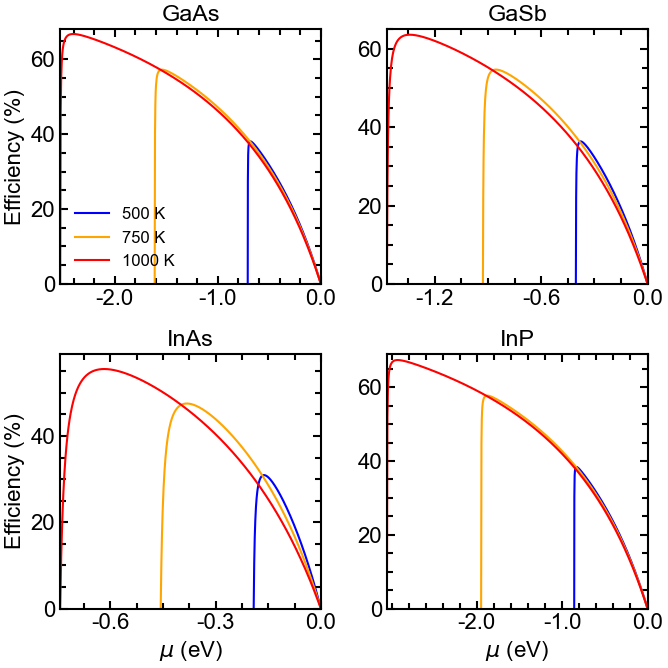

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

# ----------------------------------#
# plot GaAs
# ----------------------------------#
axes[0,0].plot(muList(Tcell[0], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), EfficiencyIdealCaseGaAs[0, :]*100, c='blue', label='500 K')
axes[0,0].plot(muList(Tcell[1], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), EfficiencyIdealCaseGaAs[1, :]*100, c='orange', label='750 K')
axes[0,0].plot(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), EfficiencyIdealCaseGaAs[2, :]*100, c='red', label='1000 K')
# X-axis
axes[0,0].set_xlim(np.min(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd)), 0.0)
axes[0,0].set_xticks([-2.0, -1.0, 0.0])
axes[0,0].set_xticklabels(['-2.0', '-1.0', '0.0'])
# Y-axis
axes[0,0].set_ylabel('Efficiency (%)')
axes[0,0].set_ylim(0.0, 68.0)
axes[0,0].legend(loc='best', prop={'size': 12})
axes[0,0].set_title(r'GaAs')

# ----------------------------------#
# plot GaSb
# ----------------------------------#
axes[0,1].plot(muList(Tcell[0], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencyIdealCaseGaSb[0, :]*100, c='blue', label='500 K')
axes[0,1].plot(muList(Tcell[1], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencyIdealCaseGaSb[1, :]*100, c='orange', label='750 K')
axes[0,1].plot(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencyIdealCaseGaSb[2, :]*100, c='red', label='1000 K')
# X-axis
axes[0,1].set_xlim(np.min(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd)), 0.0)
axes[0,1].set_xticks([-1.2, -0.6, 0.0])
axes[0,1].set_xticklabels(['-1.2', '-0.6', '0.0'])
# Y-axis
axes[0,1].set_ylim(0.0, 65.0)

axes[0,1].set_title(r'GaSb')

# ----------------------------------#
# plot InAs
# ----------------------------------#
axes[1,0].plot(muList(Tcell[0], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), EfficiencyIdealCaseInAs[0, :]*100, c='blue', label='500 K')
axes[1,0].plot(muList(Tcell[1], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), EfficiencyIdealCaseInAs[1, :]*100, c='orange', label='750 K')
axes[1,0].plot(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), EfficiencyIdealCaseInAs[2, :]*100, c='red', label='1000 K')

# X-axis
axes[1,0].set_xlabel(r'$\mu$ (eV)')
axes[1,0].set_xlim(np.min(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd)), 0.0)
axes[1,0].set_xticks([-0.6, -0.3, 0.0])
axes[1,0].set_xticklabels(['-0.6', '-0.3', '0.0'])
# Y-axis
axes[1,0].set_ylabel('Efficiency (%)')
axes[1,0].set_ylim(0.0, 59.0)

axes[1,0].set_title(r'InAs')

# ----------------------------------#
# plot InP
# ----------------------------------#
axes[1,1].plot(muList(Tcell[0], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), EfficiencyIdealCaseInP[0, :]*100, c='blue', label='500 K')
axes[1,1].plot(muList(Tcell[1], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), EfficiencyIdealCaseInP[1, :]*100, c='orange',label='750 K')
axes[1,1].plot(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), EfficiencyIdealCaseInP[2, :]*100, c='red', label='1000 K')
# X-axis
axes[1,1].set_xlabel(r'$\mu$ (eV)')
axes[1,1].set_xlim(np.min(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd)), 0.0)
axes[1,1].set_xticks([-2.0, -1.0, 0.0])
axes[1,1].set_xticklabels(['-2.0', '-1.0', '0.0'])
# Y-axis
axes[1,1].set_ylim(0.0, 69.0)

axes[1,1].set_title(r'InP')

plt.tight_layout()

# save figure
fig.savefig('./imag/EfficiencyIdealCase.svg')

plt.show()

## Efficiency with sub-bandgap and heat losses

In [15]:
# GaAs
EfficiencySubbandgapHeatGaAs = np.array([
                               np.array([cellTRRealistic.efficiency_with_Subbandgap_Heat(EgapGaAs, Tc, Tamb, x, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, UU) 
                               for x in muList(Tc, Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd)] )
                               for Tc in Tcell
                               ]) 
# GaSb
EfficiencySubbandgapHeatGaSb = np.array([
                               np.array([cellTRRealistic.efficiency_with_Subbandgap_Heat(EgapGaSb, Tc, Tamb, x, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, UU)
                               for x in muList(Tc, Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd)] )
                               for Tc in Tcell
                               ]) 
# InAs
EfficiencySubbandgapHeatInAs = np.array([
                               np.array([cellTRRealistic.efficiency_with_Subbandgap_Heat(EgapInAs, Tc, Tamb, x, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, UU) 
                               for x in muList(Tc, Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd)] )
                               for Tc in Tcell
                               ]) 
# InP
EfficiencySubbandgapHeatInP = np.array([
                              np.array([cellTRRealistic.efficiency_with_Subbandgap_Heat(EgapInP, Tc, Tamb, x, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, UU) 
                              for x in muList(Tc, Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd)] )
                              for Tc in Tcell
                              ]) 
# Si
EfficiencySubbandgapHeatSi = np.array([
                             np.array([cellTRRealistic.efficiency_with_Subbandgap_Heat(EgapSi, Tc, Tamb, x, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd, UU) 
                             for x in muList(Tc, Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd)] )
                             for Tc in Tcell
                             ]) 

In [16]:
# Maximum efficiency
MaxEfficiencySubbandgapHeatGaAs = np.max(EfficiencySubbandgapHeatGaAs, axis=1)*100
MaxEfficiencySubbandgapHeatGaSb = np.max(EfficiencySubbandgapHeatGaSb, axis=1)*100
MaxEfficiencySubbandgapHeatInAs = np.max(EfficiencySubbandgapHeatInAs, axis=1)*100
MaxEfficiencySubbandgapHeatInP = np.max(EfficiencySubbandgapHeatInP, axis=1)*100
MaxEfficiencySubbandgapHeatSi = np.max(EfficiencySubbandgapHeatSi, axis=1)*100

#print data
print('###################################')
print(' Maximum Efficiency')
print(' Sub-bandgap and heat losses [%]')
print('###################################')
print('# Tc [K]   GaAs          GaSb          InAs          InP           Si')

for i in range(len(Tcell)):
    print('{:<5.0f}      {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f}'.format(
        Tcell[i], 
        MaxEfficiencySubbandgapHeatGaAs[i], 
        MaxEfficiencySubbandgapHeatGaSb[i], 
        MaxEfficiencySubbandgapHeatInAs[i], 
        MaxEfficiencySubbandgapHeatInP[i], 
        MaxEfficiencySubbandgapHeatSi[i]
    ))

###################################
 Maximum Efficiency
 Sub-bandgap and heat losses [%]
###################################
# Tc [K]   GaAs          GaSb          InAs          InP           Si
500        0.00000200    0.01883622    4.04673377    0.00000002    0.01047393   
750        0.00496369    0.97376174    14.96542593   0.00030945    0.38376387   
1000       0.18817035    4.58303467    24.98974087   0.03181372    2.23909111   


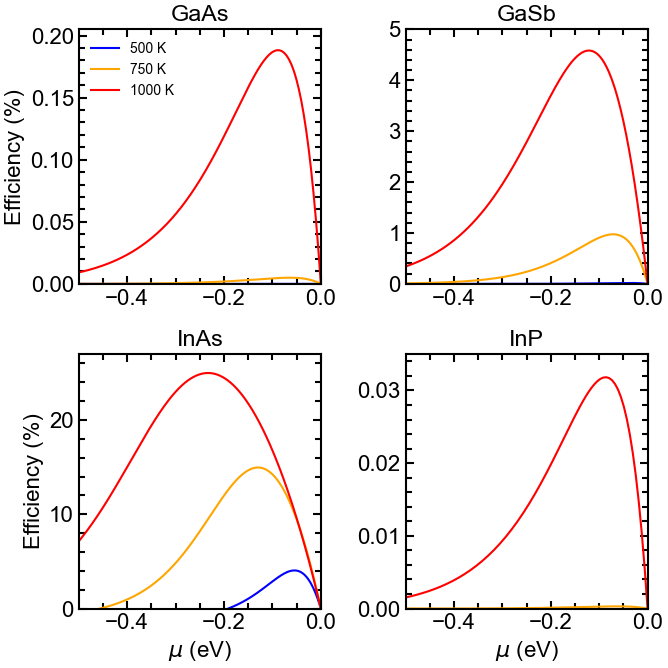

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

# ----------------------------------#
# plot GaAs
# ----------------------------------#
axes[0,0].plot(muList(Tcell[0], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), EfficiencySubbandgapHeatGaAs[0, :]*100, c='blue', label='500 K')
axes[0,0].plot(muList(Tcell[1], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), EfficiencySubbandgapHeatGaAs[1, :]*100, c='orange', label='750 K')
axes[0,0].plot(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), EfficiencySubbandgapHeatGaAs[2, :]*100, c='red', label='1000 K')
# X-axis
axes[0,0].set_xlim(-0.5, 0.0)
# Y-axis
axes[0,0].set_ylabel('Efficiency (%)')
axes[0,0].set_ylim(0.0, 0.205)
axes[0,0].legend(loc='best', prop={'size': 10})
axes[0,0].set_title(r'GaAs')

# ----------------------------------#
# plot GaSb
# ----------------------------------#
axes[0,1].plot(muList(Tcell[0], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencySubbandgapHeatGaSb[0, :]*100, c='blue', label='500 K')
axes[0,1].plot(muList(Tcell[1], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencySubbandgapHeatGaSb[1, :]*100, c='orange', label='750 K')
axes[0,1].plot(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencySubbandgapHeatGaSb[2, :]*100, c='red', label='1000 K')
# X-axis
axes[0,1].set_xlim(-0.5, 0.0)
# Y-axis
axes[0,1].set_ylim(0.0, 5.0)
axes[0,1].set_title(r'GaSb')

# ----------------------------------#
# plot InAs
# ----------------------------------#
axes[1,0].plot(muList(Tcell[0], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), EfficiencySubbandgapHeatInAs[0, :]*100, c='blue', label='500 K')
axes[1,0].plot(muList(Tcell[1], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), EfficiencySubbandgapHeatInAs[1, :]*100, c='orange', label='750 K')
axes[1,0].plot(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), EfficiencySubbandgapHeatInAs[2, :]*100, c='red', label='1000 K')
# X-axis
axes[1,0].set_xlabel(r'$\mu$ (eV)')
axes[1,0].set_xlim(-0.5, 0.0)
# Y-axis
axes[1,0].set_ylabel('Efficiency (%)')
axes[1,0].set_ylim(0.0, 27.0)
axes[1,0].set_title(r'InAs')
# ----------------------------------#
# plot InP
# ----------------------------------#
axes[1,1].plot(muList(Tcell[0], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), EfficiencySubbandgapHeatInP[0, :]*100, c='blue', label='500 K')
axes[1,1].plot(muList(Tcell[1], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), EfficiencySubbandgapHeatInP[1, :]*100, c='orange',label='750 K')
axes[1,1].plot(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), EfficiencySubbandgapHeatInP[2, :]*100, c='red', label='1000 K')
# X-axis
axes[1,1].set_xlabel(r'$\mu$ (eV)')
axes[1,1].set_xlim(-0.5, 0.0)
# Y-axis
axes[1,1].set_ylim(0.0, 0.035)
axes[1,1].set_title(r'InP')

plt.tight_layout()

# save figure
fig.savefig('./imag/EfficiencywithSubbandgapHeatLosses.svg')

plt.show()

## Power density with nonradiative generation ratio

In [18]:
# define chemical potential list without nonradiative generation ratio
def muList_NR(temp_cell, temp_amb, egap, omega, alpha, refractive, reflectivity, thickness, lambdaNR):
    muVoc = np.round(cellTRRealistic.find_mu_NR(egap, temp_cell, temp_amb, omega, alpha, refractive, reflectivity, thickness, lambdaNR), decimals=6)
    return np.linspace(muVoc, 0.0, 501)    

In [19]:
# GaAs
PowerDensityNRGaAs = np.array([
                   np.array([cellTRRealistic.power_density_NR(EgapGaAs, Tc, Tamb, x, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, 0.5) for x in muList_NR(Tc, Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, 0.5)])
                   for Tc in Tcell
                   ])
# GaSb
PowerDensityNRGaSb = np.array([
                   np.array([cellTRRealistic.power_density_NR(EgapGaSb, Tc, Tamb, x, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5) for x in muList_NR(Tc, Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5)])
                   for Tc in Tcell
                   ])
# InAs
PowerDensityNRInAs = np.array([
                   np.array([cellTRRealistic.power_density_NR(EgapInAs, Tc, Tamb, x, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, 0.5) for x in muList_NR(Tc, Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, 0.5)])
                   for Tc in Tcell
                   ])
# InP
PowerDensityNRInP = np.array([
                   np.array([cellTRRealistic.power_density_NR(EgapInP, Tc, Tamb, x, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, 0.5) for x in muList_NR(Tc, Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, 0.5)])
                   for Tc in Tcell
                   ])
# Si
PowerDensityNRSi = np.array([
                   np.array([cellTRRealistic.power_density_NR(EgapSi, Tc, Tamb, x, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd, 0.5) for x in muList_NR(Tc, Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd, 0.5)])
                   for Tc in Tcell
                   ])

In [20]:
# Maximum power density
MaxPowerDensityNRGaAs = np.max(PowerDensityNRGaAs, axis=1)
MaxPowerDensityNRGaSb = np.max(PowerDensityNRGaSb, axis=1)
MaxPowerDensityNRInAs = np.max(PowerDensityNRInAs, axis=1)
MaxPowerDensityNRInP = np.max(PowerDensityNRInP, axis=1)
MaxPowerDensityNRSi = np.max(PowerDensityNRSi, axis=1)

#print data
print('###################################')
print('Maximum Power Density with')
print('nonradaitive generation ratio [W/m^2]')
print('###################################')
print('# Tc [K]   GaAs          GaSb          InAs          InP           Si')

for i in range(len(Tcell)):
    print('{:<5.0f}      {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f}'.format(
        Tcell[i], 
        MaxPowerDensityNRGaAs[i], 
        MaxPowerDensityNRGaSb[i], 
        MaxPowerDensityNRInAs[i], 
        MaxPowerDensityNRInP[i], 
        MaxPowerDensityNRSi[i]
    ))

###################################
Maximum Power Density with
nonradaitive generation ratio [W/m^2]
###################################
# Tc [K]   GaAs          GaSb          InAs          InP           Si
500        0.00000858    0.09076347    27.27984949   0.00000009    0.04521956   
750        0.06249500    19.86055023   598.38096270  0.00354929    4.70070590   
1000       6.84189483    391.00755135  3823.90179696 0.91833393    64.44629138  


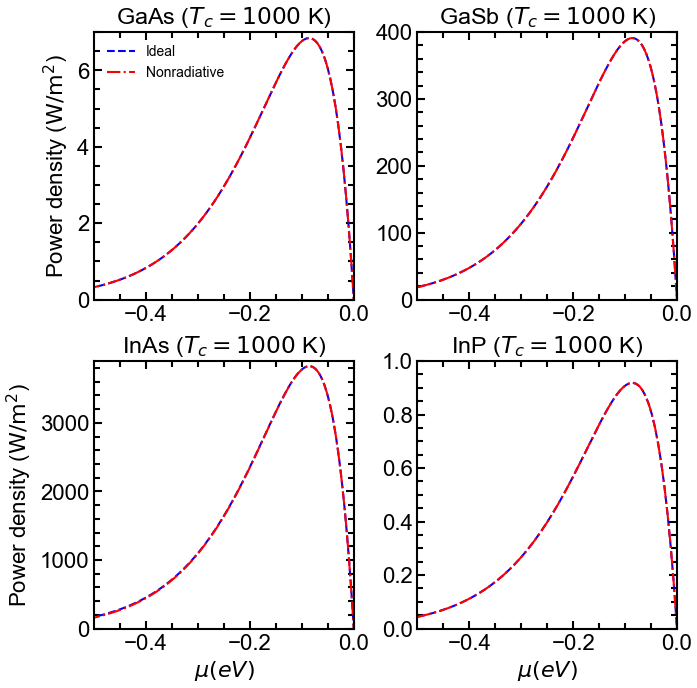

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

# ----------------------------------#
# plot GaAs
# ----------------------------------#
axes[0,0].plot(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), PowerDensityGaAs[2, :], c='blue', ls='--', label='Ideal')
axes[0,0].plot(muList_NR(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, 0.5), PowerDensityNRGaAs[2, :], c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[0,0].set_xlim(-0.5, 0.0)
# Y-axis
axes[0,0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
axes[0,0].set_ylim(0.0, 7.0)

axes[0,0].legend(loc='best', prop={'size': 10})
axes[0,0].set_title(r'GaAs ($T_{c} = 1000$ K)')

# ----------------------------------#
# plot GaSb
# ----------------------------------#
axes[0,1].plot(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), PowerDensityGaSb[2, :], c='blue', ls='--', label='Ideal')
axes[0,1].plot(muList_NR(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5), PowerDensityNRGaSb[2, :], c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[0,1].set_xlim(-0.5, 0.0)
# Y-axis
axes[0,1].set_ylim(0.0, 400.0)

axes[0,1].set_title(r'GaSb ($T_{c} = 1000$ K)')

# ----------------------------------#
# plot InAs
# ----------------------------------#
axes[1,0].plot(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), PowerDensityInAs[2, :], c='blue', ls='--', label='Ideal')
axes[1,0].plot(muList_NR(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, 0.5), PowerDensityNRInAs[2, :], c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[1,0].set_xlabel(r'$\mu (eV)$')
axes[1,0].set_xlim(-0.5, 0.0)
# Y-axis
axes[1,0].set_ylabel('Power density ($\mathrm{W/m}^2$)')
axes[1,0].set_ylim(0.0, 3900)

axes[1,0].set_title(r'InAs ($T_{c} = 1000$ K)')

# ----------------------------------#
# plot InP
# ----------------------------------#
axes[1,1].plot(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), PowerDensityInP[2, :], c='blue', ls='--', label='Ideal')
axes[1,1].plot(muList_NR(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, 0.5), PowerDensityNRInP[2, :], c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[1,1].set_xlabel(r'$\mu (eV)$')
axes[1,1].set_xlim(-0.5, 0.0)
# Y-axis
axes[1,1].set_ylim(0.0, 1.0)

axes[1,1].set_title(r'InP ($T_{c} = 1000$ K)')

# save figure
fig.savefig('./imag/PowerDensityNonradiative.svg')

plt.tight_layout()
plt.show()

## Efficiency with nonradiative generation ratio

In [22]:
# GaAs
EfficiencyNRGaAs = np.array([
                          np.array([cellTRRealistic.efficiency_with_NR_losses(EgapGaAs, Tc, Tamb, x, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# GaSb
EfficiencyNRGaSb = np.array([
                          np.array([cellTRRealistic.efficiency_with_NR_losses(EgapGaSb, Tc, Tamb, x, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# InAs
EfficiencyNRInAs = np.array([
                          np.array([cellTRRealistic.efficiency_with_NR_losses(EgapInAs, Tc, Tamb, x, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# InP
EfficiencyNRInP = np.array([
                          np.array([cellTRRealistic.efficiency_with_NR_losses(EgapInP, Tc, Tamb, x, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# Si
EfficiencyNRSi = np.array([
                          np.array([cellTRRealistic.efficiency_with_NR_losses(EgapSi, Tc, Tamb, x, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd,0.5) 
                          for x in muList_NR(Tc, Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 

In [23]:
# Maximum efficiency
MaxEfficiencyNRGaAs = np.max(EfficiencyNRGaAs, axis=1)*100
MaxEfficiencyNRGaSb = np.max(EfficiencyNRGaSb, axis=1)*100
MaxEfficiencyNRInAs = np.max(EfficiencyNRInAs, axis=1)*100
MaxEfficiencyNRInP = np.max(EfficiencyNRInP, axis=1)*100
MaxEfficiencyNRSi = np.max(EfficiencyNRSi, axis=1)*100

#print data
print('###################################')
print(' Maximum Efficiency')
print(' nonradiative generation ratio [%]')
print(' with λ = 50%')
print('###################################')
print('# Tc [K]   GaAs          GaSb          InAs          InP           Si')

for i in range(len(Tcell)):
    print('{:<5.0f}      {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f}'.format(
        Tcell[i], 
        MaxEfficiencyNRGaAs[i], 
        MaxEfficiencyNRGaSb[i], 
        MaxEfficiencyNRInAs[i], 
        MaxEfficiencyNRInP[i], 
        MaxEfficiencyNRSi[i]
    ))

###################################
 Maximum Efficiency
 nonradiative generation ratio [%]
 with λ = 50%
###################################
# Tc [K]   GaAs          GaSb          InAs          InP           Si
500        33.73688501   30.16036421   22.07328287   34.62099202   28.75236400  
750        54.54132940   50.84323462   41.62437856   55.38792377   49.29766920  
1000       64.90679362   60.96679012   51.26859135   65.76553858   59.25619765  


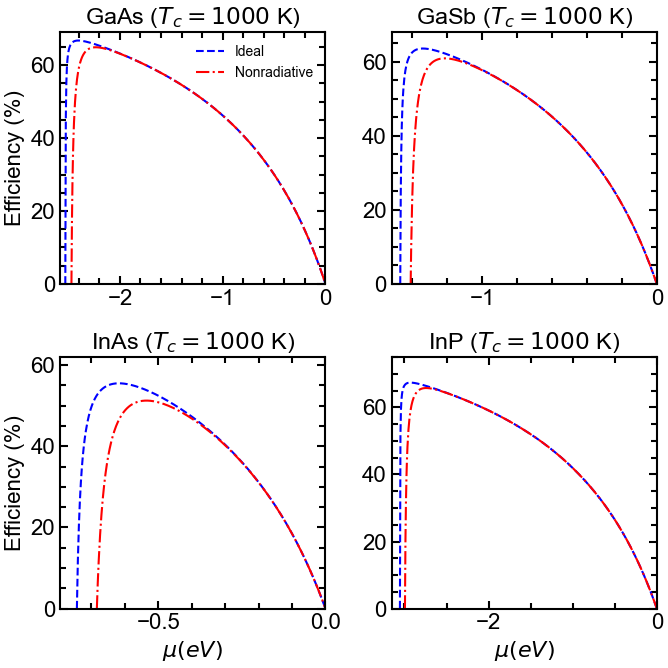

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

# ----------------------------------#
# plot GaAs
# ----------------------------------#
axes[0,0].plot(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd), EfficiencyIdealCaseGaAs[2, :]*100, c='blue', ls='--', label='Ideal')
axes[0,0].plot(muList_NR(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, 0.5), EfficiencyNRGaAs[2, :]*100, c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[0,0].set_xlim(np.min(muList(Tcell[2], Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd))-0.05, 0.0 )
# Y-axis
axes[0,0].set_ylabel('Efficiency (%)')
axes[0,0].set_ylim(0.0, 69.0)

axes[0,0].legend(loc='best', prop={'size': 10})
axes[0,0].set_title(r'GaAs ($T_{c} = 1000$ K)')

# ----------------------------------#
# plot GaSb
# ----------------------------------#
axes[0,1].plot(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencyIdealCaseGaSb[2, :]*100, c='blue', ls='--', label='Ideal')
axes[0,1].plot(muList_NR(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5), EfficiencyNRGaSb[2, :]*100, c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[0,1].set_xlim(np.min(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd))-0.05, 0.0)
# Y-axis
axes[0,1].set_ylim(0.0, 68.0)

axes[0,1].set_title(r'GaSb ($T_{c} = 1000$ K)')

# ----------------------------------#
# plot InAs
# ----------------------------------#
axes[1,0].plot(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd), EfficiencyIdealCaseInAs[2, :]*100, c='blue', ls='--', label='Ideal')
axes[1,0].plot(muList_NR(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, 0.5), EfficiencyNRInAs[2, :]*100, c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[1,0].set_xlabel(r'$\mu (eV)$')
axes[1,0].set_xlim(np.min(muList(Tcell[2], Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd))-0.05, 0.0)
# Y-axis
axes[1,0].set_ylabel('Efficiency (%)')
axes[1,0].set_ylim(0.0, 62.0)

axes[1,0].set_title(r'InAs ($T_{c} = 1000$ K)')

# ----------------------------------#
# plot InP
# ----------------------------------#
axes[1,1].plot(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd), EfficiencyIdealCaseInP[2, :]*100, c='blue', ls='--', label='Ideal')
axes[1,1].plot(muList_NR(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, 0.5), EfficiencyNRInP[2, :]*100, c='red', ls='-.', label= 'Nonradiative')
# X-axis
axes[1,1].set_xlabel(r'$\mu (eV)$')
axes[1,1].set_xlim(np.min(muList(Tcell[2], Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd))-0.1, 0.0)
# Y-axis
axes[1,1].set_ylim(0.0, 75.0)

axes[1,1].set_title(r'InP ($T_{c} = 1000$ K)')


plt.tight_layout()

# Save figure
fig.savefig('./imag/EfficiencywithNonradiative.svg')

plt.show()

## Efficiency with all losses

In [25]:
# GaAs
EfficiencywithAllLossesGaAs = np.array([
                          np.array([cellTRRealistic.efficiency_all_losses(EgapGaAs, Tc, Tamb, x, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, UU, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapGaAs, EnGaAs, AbsorptionGaAs, RefractiveGaAs, ReflectivityGaAs, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# GaSb
EfficiencywithAllLossesGaSb = np.array([
                          np.array([cellTRRealistic.efficiency_all_losses(EgapGaSb, Tc, Tamb, x, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, UU, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# InAs
EfficiencywithAllLossesInAs = np.array([
                          np.array([cellTRRealistic.efficiency_all_losses(EgapInAs, Tc, Tamb, x, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, UU, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapInAs, EnInAs, AbsorptionInAs, RefractiveInAs, ReflectivityInAs, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# InP
EfficiencywithAllLossesInP = np.array([
                          np.array([cellTRRealistic.efficiency_all_losses(EgapInP, Tc, Tamb, x, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, UU, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapInP, EnInP, AbsorptionInP, RefractiveInP, ReflectivityInP, dd, 0.5)] )
                          for Tc in Tcell
                           ]) 
# Si
EfficiencywithAllLossesSi = np.array([
                          np.array([cellTRRealistic.efficiency_all_losses(EgapSi, Tc, Tamb, x, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd, UU, 0.5) 
                          for x in muList_NR(Tc, Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd, 0.5)] )
                          for Tc in Tcell
                           ])

In [26]:
# Maximum efficiency
MaxEfficiencywithAllLossesGaAs = np.max(EfficiencywithAllLossesGaAs, axis=1)*100
MaxEfficiencywithAllLossesGaSb = np.max(EfficiencywithAllLossesGaSb, axis=1)*100
MaxEfficiencywithAllLossesInAs = np.max(EfficiencywithAllLossesInAs, axis=1)*100
MaxEfficiencywithAllLossesInP = np.max(EfficiencywithAllLossesInP, axis=1)*100
MaxEfficiencywithAllLossesSi = np.max(EfficiencywithAllLossesSi, axis=1)*100

#print data
print('###################################')
print(' Maximum Efficiency')
print(' with all losses [%]')
print('###################################')
print('# Tc [K]   GaAs          GaSb          InAs          InP           Si')

for i in range(len(Tcell)):
    print('{:<5.0f}      {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f} {:<13.8f}'.format(
        Tcell[i], 
        MaxEfficiencywithAllLossesGaAs[i], 
        MaxEfficiencywithAllLossesGaSb[i], 
        MaxEfficiencywithAllLossesInAs[i], 
        MaxEfficiencywithAllLossesInP[i], 
        MaxEfficiencywithAllLossesSi[i]
    ))

###################################
 Maximum Efficiency
 with all losses [%]
###################################
# Tc [K]   GaAs          GaSb          InAs          InP           Si
500        0.00000200    0.01883211    3.88267202    0.00000002    0.01046322   
750        0.00496286    0.97377629    14.88452022   0.00030955    0.38376497   
1000       0.18823300    4.58309940    24.93981364   0.03179962    2.23907739   


## Comparison efficiency

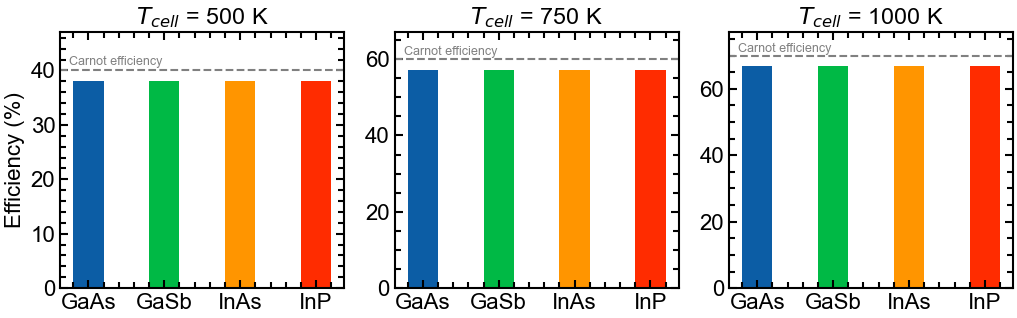

In [27]:
Material = [r'GaAs', r'GaSb', r'InAs', r'InP']

def carnot_efficiency(temp_cell, temp_amb):
    return 1.0 - (temp_amb / temp_cell)

# plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10.5, 3.5))

bar_width = 0.4
x_positions = [1, 2, 3, 4]
#----------------------------------#
# Tcell = 500 K
#----------------------------------#
axes[0].bar(x_positions[0], MaxEfficiencyIdealGaAs[0], width=bar_width)
axes[0].bar(x_positions[1], MaxEfficiencyIdealGaAs[0], width=bar_width)
axes[0].bar(x_positions[2], MaxEfficiencyIdealGaAs[0], width=bar_width)
axes[0].bar(x_positions[3], MaxEfficiencyIdealGaAs[0], width=bar_width)
# X-Axis
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(Material)
# Y-Axis
axes[0].set_ylim(0.0, carnot_efficiency(Tcell[0], Tamb) * 100 + 7.0)
axes[0].set_ylabel('Efficiency (%)')
axes[0].axhline(carnot_efficiency(Tcell[0], Tamb) * 100, color='gray', linestyle='--')
axes[0].text(0.75, carnot_efficiency(Tcell[0], Tamb) * 100 + 1, 'Carnot efficiency', fontsize=9, color='gray')

axes[0].set_title(r'$T_{cell}$ = 500 K')

#----------------------------------#
# Tcell = 750 K
#----------------------------------#
axes[1].bar(x_positions[0], MaxEfficiencyIdealGaAs[1], width=bar_width)
axes[1].bar(x_positions[1], MaxEfficiencyIdealGaAs[1], width=bar_width)
axes[1].bar(x_positions[2], MaxEfficiencyIdealGaAs[1], width=bar_width)
axes[1].bar(x_positions[3], MaxEfficiencyIdealGaAs[1], width=bar_width)
# X-Axis
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(Material)
# Y-Axis
axes[1].set_ylim(0.0, carnot_efficiency(Tcell[1], Tamb) * 100 + 7.0)
axes[1].axhline(carnot_efficiency(Tcell[1], Tamb) * 100, color='gray', linestyle='--')
axes[1].text(0.75, carnot_efficiency(Tcell[1], Tamb) * 100 + 1, 'Carnot efficiency', fontsize=9, color='gray')

axes[1].set_title(r'$T_{cell}$ = 750 K')

#----------------------------------#
# Tcell = 1000 K
#----------------------------------#
axes[2].bar(x_positions[0], MaxEfficiencyIdealGaAs[2], width=bar_width)
axes[2].bar(x_positions[1], MaxEfficiencyIdealGaAs[2], width=bar_width)
axes[2].bar(x_positions[2], MaxEfficiencyIdealGaAs[2], width=bar_width)
axes[2].bar(x_positions[3], MaxEfficiencyIdealGaAs[2], width=bar_width)
# X-Axis
axes[2].set_xticks(x_positions)
axes[2].set_xticklabels(Material)
# Y-Axis
axes[2].set_ylim(0.0, carnot_efficiency(Tcell[2], Tamb) * 100 + 7.0)
axes[2].axhline(carnot_efficiency(Tcell[2], Tamb) * 100, color='gray', linestyle='--')
axes[2].text(0.75, carnot_efficiency(Tcell[2], Tamb) * 100 + 1, 'Carnot efficiency', fontsize=9, color='gray')

axes[2].set_title(r'$T_{cell}$ = 1000 K')

plt.tight_layout()

# save figure
fig.savefig('./imag/comparison-efficiency-carnot.svg')

plt.show()

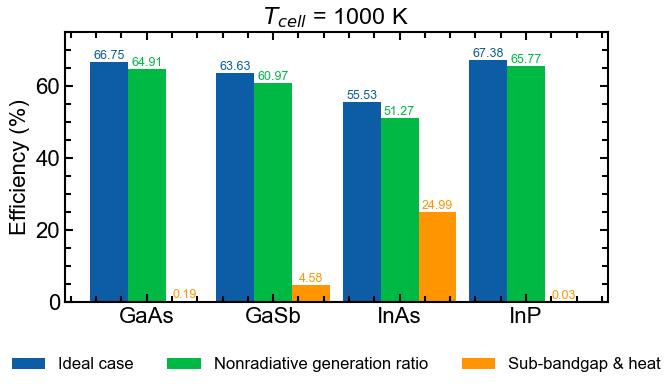

In [28]:
# Comparison ideal case and all losses
fig = plt.figure(figsize=(7.0, 3.5))

x = np.arange(len(Material))
width = 0.3  

IdealEfficiency1000 = np.array([MaxEfficiencyIdealGaAs[2], MaxEfficiencyIdealGaSb[2], MaxEfficiencyIdealInAs[2], MaxEfficiencyIdealInP[2] ])
SubBandgapEfficiency1000 = np.array([MaxEfficiencySubbandgapHeatGaAs[2], MaxEfficiencySubbandgapHeatGaSb[2], MaxEfficiencySubbandgapHeatInAs[2], MaxEfficiencySubbandgapHeatInP[2] ])
NonradiativeEfficiency1000 = np.array([MaxEfficiencyNRGaAs[2], MaxEfficiencyNRGaSb[2], MaxEfficiencyNRInAs[2], MaxEfficiencyNRInP[2] ])
AllLosses1000 = np.array([MaxEfficiencywithAllLossesGaAs[2], MaxEfficiencywithAllLossesGaSb[2], MaxEfficiencywithAllLossesInAs[2], MaxEfficiencywithAllLossesInP[2] ])

# plot bar chart
rects1 = plt.bar(x - width, IdealEfficiency1000, width, color='#0C5DA5', label='Ideal case')
rects2 = plt.bar(x, NonradiativeEfficiency1000, width, color='#00B945', label='Nonradiative generation ratio')
rects3 = plt.bar(x + width, SubBandgapEfficiency1000, width, color = '#FF9500', label='Sub-bandgap & heat')

# Add text annotations for each bar
for i, (r1, r2, r3) in enumerate(zip(rects1, rects2, rects3)):
    plt.text(r1.get_x() + r1.get_width() / 2, r1.get_height(), f"{IdealEfficiency1000[i]:.2f}", ha='center', va='bottom',fontsize=9, color='#0C5DA5')
    plt.text(r2.get_x() + r2.get_width() / 2, r2.get_height(), f"{NonradiativeEfficiency1000[i]:.2f}", ha='center', va='bottom', fontsize=9, color='#00B945')
    plt.text(r3.get_x() + r3.get_width() / 2, r3.get_height(), f"{SubBandgapEfficiency1000[i]:.2f}", ha='center', va='bottom', fontsize=9, color='#FF9500')

# Add labels and title
plt.ylabel('Efficiency (%)')
plt.xticks(x, Material)
plt.ylim(0.0, 75.0)

# Move the legend outside the figure
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

plt.title(r'$T_{cell}$ = 1000 K')

# Save figure
fig.savefig('./imag/comparison-efficiency.svg')

plt.show()

## Detailed-balance model

In [29]:
from dbm import *

In [30]:
# define chemical potential list without nonradiative generation ratio
def muList_DBM(temp_cell, temp_amb, egap):
    muVoc = np.round(cellTRDBM.find_mu(temp_cell, temp_amb, egap), decimals=6)
    return np.linspace(muVoc, 0.0, 501)

# define chemical potential list with nonradiative generation ratio
def muList_DBM_NR(temp_cell, temp_amb, egap, lambdaNR):
    muVoc = np.round(cellTRDBM.find_mu_NR(temp_cell, temp_amb, egap, lambdaNR), decimals=6)
    return np.linspace(muVoc, 0.0, 501)

In [31]:
EgapListMaterials = np.array([EgapGaAs, EgapGaSb, EgapInAs, EgapInP])

# Efficiency ideal case DBM
EfficiencyIdealCaseDBM_1000 = np.array([
                                        np.array([cellTRDBM.efficiency_ideal(Tcell[2], Tamb, x, egap) for x in muList_DBM(Tcell[2], Tamb, egap)])
                                        for egap in EgapListMaterials])
MaxefficiencyIdealCaseDBM_100 = np.max(EfficiencyIdealCaseDBM_1000, axis=1)*100

# Efficiency with all loses
EfficiencyAllLosses_1000 = np.array([
                                    np.array([cellTRDBM.efficiency_all_losses(Tcell[2], Tamb, x, egap, UU, 0.5) for x in muList_DBM_NR(Tcell[2], Tamb, egap, 0.5)])
                                    for egap in EgapListMaterials])
MaxEfficiencyAllLosses_1000 = np.max(EfficiencyAllLosses_1000, axis=1)*100

print('###################################')
print(' Maximum efficiency @Tc =1000 K')
print(' with DBM')
print('###################################')
print('Materials    Ideal case (%)   All Losses (%)')
for i in range(len(EgapListMaterials)):
    print('{:<5.4}        {:<13.6f}    {:<13.6f}'.format(Material[i], MaxefficiencyIdealCaseDBM_100[i], MaxEfficiencyAllLosses_1000[i]))

###################################
 Maximum efficiency @Tc =1000 K
 with DBM
###################################
Materials    Ideal case (%)   All Losses (%)
GaAs         67.455749        0.006961     
GaSb         65.114390        0.539504     
InAs         56.897078        11.556771    
InP          67.943058        0.000746     


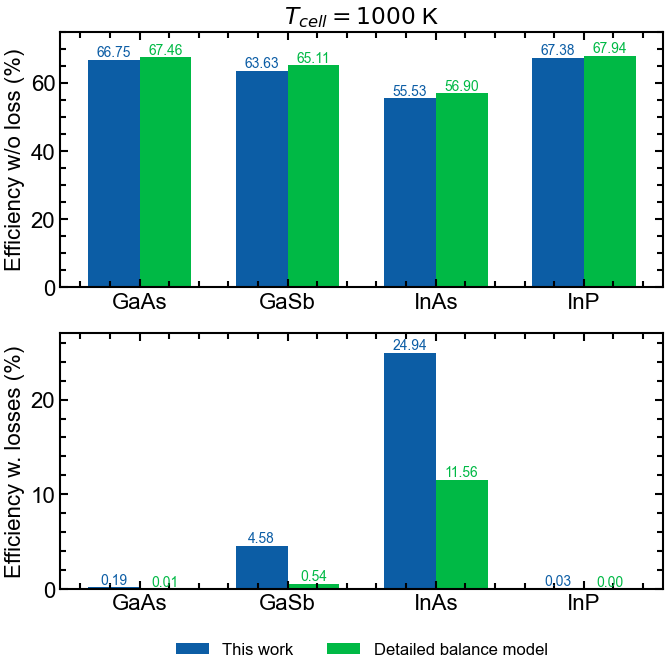

In [32]:
#################################
# plotting
#################################
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
x = np.arange(len(Material))  
width = 0.35 

#-------------------------------#
# Efficiency w/o losses
#-------------------------------#
rects1 = ax[0].bar(x - width/2, IdealEfficiency1000, width, color='#0C5DA5', label='This work')
rects2 = ax[0].bar(x + width/2, MaxefficiencyIdealCaseDBM_100, width, color='#00B945', label='Detailed balance model')
# Add text annotations for each bar
for i, (r1, r2) in enumerate(zip(rects1, rects2)):
    ax[0].text(r1.get_x() + r1.get_width() / 2, r1.get_height(), f"{IdealEfficiency1000[i]:.2f}", ha='center', va='bottom',fontsize=10, color='#0C5DA5')
    ax[0].text(r2.get_x() + r2.get_width() / 2, r2.get_height(), f"{MaxefficiencyIdealCaseDBM_100[i]:.2f}", ha='center', va='bottom', fontsize=10, color='#00B945')

# Add labels and title
ax[0].set_ylabel('Efficiency w/o loss (%)')
ax[0].set_xticks(x)
ax[0].set_xticklabels(Material)
ax[0].set_ylim(0.0, 75.0)
ax[0].set_title(r'$T_{cell} = 1000$ K')

#-------------------------------#
# Efficiency w/o losses
#-------------------------------#
rects1 = ax[1].bar(x - width/2, AllLosses1000, width, color='#0C5DA5', label='This work')
rects2 = ax[1].bar(x + width/2, MaxEfficiencyAllLosses_1000, width, color='#00B945', label='Detailed balance model')
# Add text annotations for each bar
for i, (r1, r2) in enumerate(zip(rects1, rects2)):
    ax[1].text(r1.get_x() + r1.get_width() / 2, r1.get_height(), f"{AllLosses1000[i]:.2f}", ha='center', va='bottom',fontsize=10, color='#0C5DA5')
    ax[1].text(r2.get_x() + r2.get_width() / 2, r2.get_height(), f"{MaxEfficiencyAllLosses_1000[i]:.2f}", ha='center', va='bottom', fontsize=10, color='#00B945')

# Add labels and title
ax[1].set_ylabel('Efficiency w. losses (%)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(Material)
ax[1].set_ylim(0.0, 27.0)

# Move the legend outside the figure
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

fig.tight_layout()

fig.savefig('./imag/comparison-TRcell-performance.svg')

plt.show()

## Comparison GaSb and Si

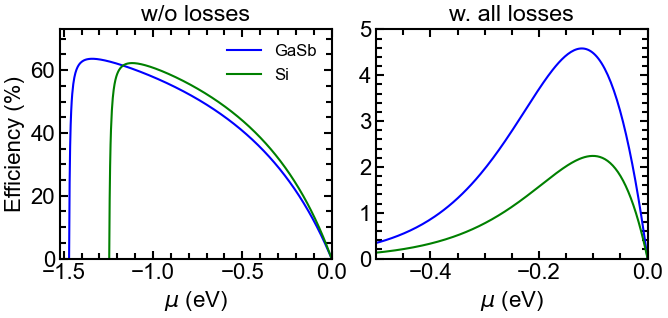

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

#--------------------------------#
# Ideal case
#--------------------------------#
# GaSb
axes[0].plot(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd), EfficiencyIdealCaseGaSb[2, :]*100, 'b-', label='GaSb')
# Si
axes[0].plot(muList(Tcell[2], Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd), EfficiencyIdealCaseSi[2, :]*100, 'g-', label='Si')
# X-axis
axes[0].set_xlabel('$\mu$ (eV)')
axes[0].set_xlim(np.min(muList(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd))-0.05, 0.0)
# Y-axis
axes[0].set_ylabel('Efficiency (%)')
axes[0].set_ylim(0.0, 73)

axes[0].legend(loc='best', prop={'size': 12})
axes[0].set_title(r'w/o losses')

#--------------------------------#
# All losses
#--------------------------------#
axes[1].plot(muList_NR(Tcell[2], Tamb, EgapGaSb, EnGaSb, AbsorptionGaSb, RefractiveGaSb, ReflectivityGaSb, dd, 0.5), EfficiencywithAllLossesGaSb[2, :]*100, 'b-', label='GaSb')
axes[1].plot(muList_NR(Tcell[2], Tamb, EgapSi, EnSi, AbsorptionSi, RefractiveSi, ReflectivitySi, dd, 0.5), EfficiencywithAllLossesSi[2, :]*100, 'g-', label='Si')
# X-axis
axes[1].set_xlabel('$\mu$ (eV)')
axes[1].set_xlim(-0.5, 0.0)
# Y-axis
axes[1].set_ylim(0.0, 5.0)
axes[1].set_title(r'w. all losses')

plt.tight_layout()

# save figure
fig.savefig('./imag/GaSb_Si.svg')
plt.show()